1. Clone NextFace and set the correct path on google drive
2. enable gpu from Menu->Runtime-> Change runtime type

In [41]:
# !git clone https://github.com/abdallahdib/NextFace.git
import sys
import os
sys.path.insert(0,'/content/NextFace') #verify ur path

2. install dependencies

In [42]:
# pip install face_alignment==1.2.0 redner-gpu

3. create optimizer and set the correct path to the **'baselMorphableModel'** directory 

PS: u have to manually upload the file **'morphableModel-2017.pickle'** from your local pc to google drive or download the **'model2017-1_face12_nomouth.h5'** from https://faces.dmi.unibas.ch/bfm/bfm2017.html and **albedoModel2020_face12_albedoPart.h5** from https://github.com/waps101/AlbedoMM/releases/download/v1.0/albedoModel2020_face12_albedoPart.h5. put these two files inside the **'baselMorphableModel'** directory

The reason for not adding these files directly because we are not allowed to share these files and u have to manually agree with their license term before using these data. so yeh! unfortunately u will have to manually download them (please refer to readme file in the github repository)

In [43]:

from optimizer import Optimizer
from config import Config
config = Config()
config.fillFromDicFile('./optimConfig.ini')
# config.device = 'cuda' # torch not compiled with cuda
config.path = './baselMorphableModel/' #verify ur path


loading optim config from:  ./optimConfig.ini


In [44]:
import torch

imagePath = './input/custom/sarah.jpg' #verify ur path
outputDir = './output/' + os.path.basename(imagePath.strip('/'))
# VALIDATE CUDA
print(torch.cuda.is_available())
torch.cuda.get_device_name(0)

optimizer = Optimizer(outputDir ,config)

True
Loading Basel Face Model 2017 from ./baselMorphableModel//morphableModel-2017.pickle...
loading mesh normals...
loading uv parametrization...
loading landmarks association file...
creating sampler...


now we can run the optimization

loading image from path:  ./input/custom/sarah.jpg
[INFO] resizing input image to fit: 256 px resolution...
detecting landmarks using: fan


init camera pose...
1/3 => Optimizing head pose and expressions using landmarks...
100%|██████████| 2000/2000 [00:26<00:00, 76.38it/s] 
2/3 => Optimizing shape, statistical albedos, expression, head pose and scene light...
100%|██████████| 401/401 [03:58<00:00,  1.68it/s]
3/3 => finetuning albedos, shape, expression, head pose and scene light...
100%|██████████| 101/101 [01:02<00:00,  1.62it/s]
took 5.46 minutes to optimize
saving to: ' ./output/sarah.jpg/ '. hold on... 


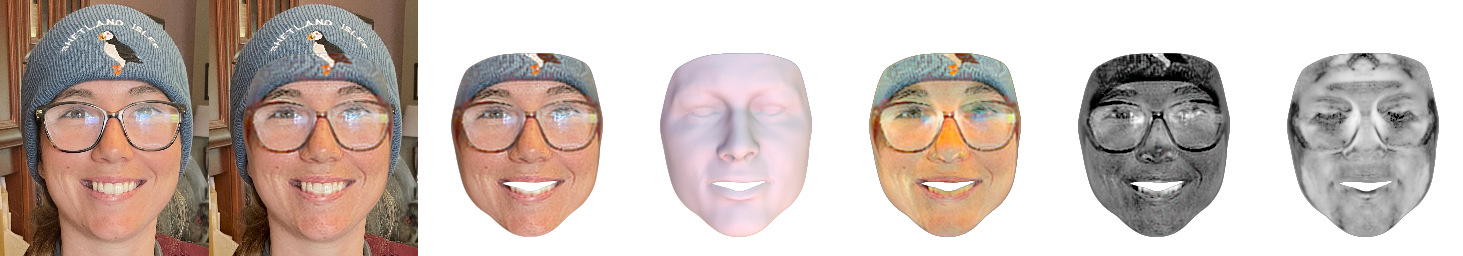

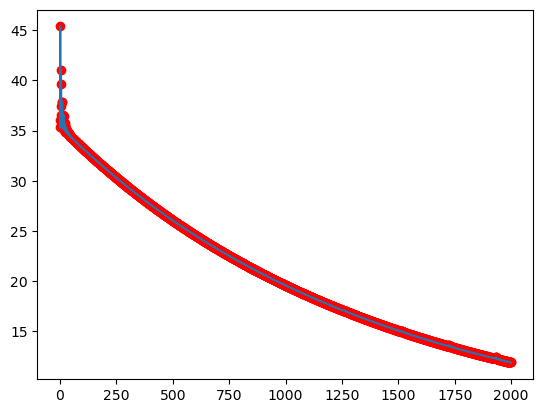

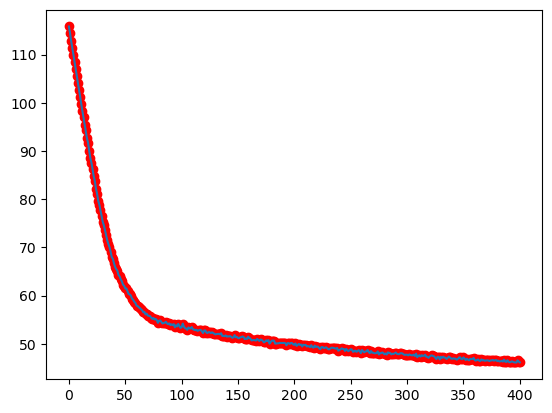

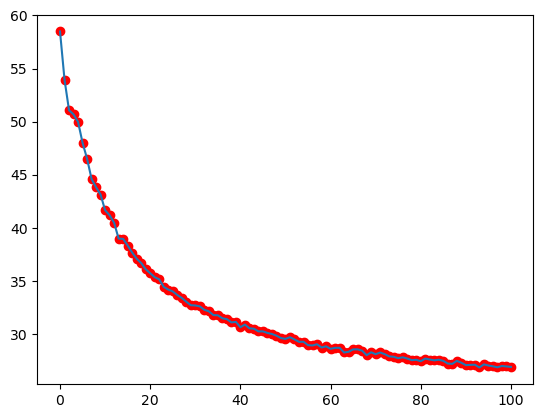

In [45]:
#run the optimization now 
optimizer.run(imagePath)
#display results
from IPython.display import Image, display
from IPython.display import Image
display(Image(outputDir + '/render_0.png'))
